# Dividir dataset en train / test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

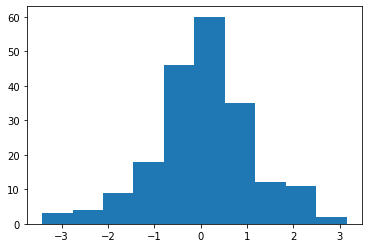

In [4]:
a = np.random.randn(data.shape[0])
plt.hist(a)
plt.show()

In [5]:
check = (a<.8)
tr = data[check]
ts = data[~check]
print(tr.shape[0], ts.shape[0], ts.shape[0]/data.shape[0])

156 44 0.22


In [6]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio",data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        15:12:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
lm.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [9]:
lm.params[0], lm.params[1], lm.params[2]

(2.921099912405138, 0.045754815101076055, 0.18799422662030896)

# Validacion del modelo con test

In [10]:
n = ts.shape[0]
k = 2
sales_pred = lm.predict(ts[["TV","Radio"]])
SSD = np.sum((ts["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD / (n-k-1))
ratioMean = RSE / np.mean(ts["Sales"])
print("RSE: ", RSE)
print("RatioMean: ", ratioMean)

RSE:  1.5876264033048573
RatioMean:  0.11021704282962087


In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        15:26:31   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def buildReport(tr, ts, y, *vars):
    myFormula=y+"~"+"+".join(vars)
    print(myFormula)
    lm = smf.ols(formula=myFormula, data=tr).fit()
    rsq = lm.rsquared
    rsqa = lm.rsquared_adj
    fval = lm.fvalue
    pfval=lm.f_pvalue
    
    n = ts.shape[0]
    k = len(vars)
    sales_pred = lm.predict(ts[list(vars)])
    SSD = np.sum((ts[y] - sales_pred)**2)
    RSE = np.sqrt(SSD / (n-k-1))
    ratioMean = RSE / np.mean(ts["Sales"])
    
    return(rsq, rsqa, fval, pfval,RSE, ratioMean)
    

In [21]:
buildReport(tr,ts,"Sales","TV")

Sales~TV


(0.6271325163490563,
 0.6247112989227515,
 259.01536538424904,
 8.257573981881197e-35,
 3.5075184302561646,
 0.24350080613958855)

In [22]:
buildReport(tr,ts,"Sales","TV", "Newspaper")

Sales~TV+Newspaper


(0.6557853429257173,
 0.6512858049247463,
 145.74503933163732,
 3.693566956542305e-36,
 3.3419957593902088,
 0.23200980342879327)

In [23]:
buildReport(tr,ts,"Sales","TV", "Radio")

Sales~TV+Radio


(0.8943878134947427,
 0.8930072620371576,
 647.8482265769762,
 2.0612164485752314e-75,
 1.6511732834187876,
 0.11462862806946457)

In [24]:
buildReport(tr,ts,"Sales","TV", "Newspaper", "Radio")

Sales~TV+Newspaper+Radio


(0.8945714192425455,
 0.8924905919907536,
 429.91142992394083,
 5.19960403289248e-74,
 1.679706642939296,
 0.11660948609865733)

Nombre | Definición | R2 | R2 Ajustado | Estadístico F | p-valor | RSE | Error
-----|-----|-----|-----|-----|-----|-----|-----
Modelo 1|Sales~TV|0.6271|0.6247|259.01536|8.2575e-35|3.5075|0.2435
Modelo 2|Sales~TV+Newspaper|0.6557|0.6512|145.7450|3.6935e-35|3.3419|0.2320
Modelo 3|Sales~TV+Radio|0.8943|0.8930|647.8482|2.0612e-35|1.6511|0.1146
Modelo 4|Sales~TV+Newspaper+Radio|0.8945|0.8924|429.9114|5.1996e-35|1.6797|0.1166